In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_float, measure
from skimage.segmentation import chan_vese
from skimage.color import rgb2gray, label2rgb
from PIL import Image, ImageStat

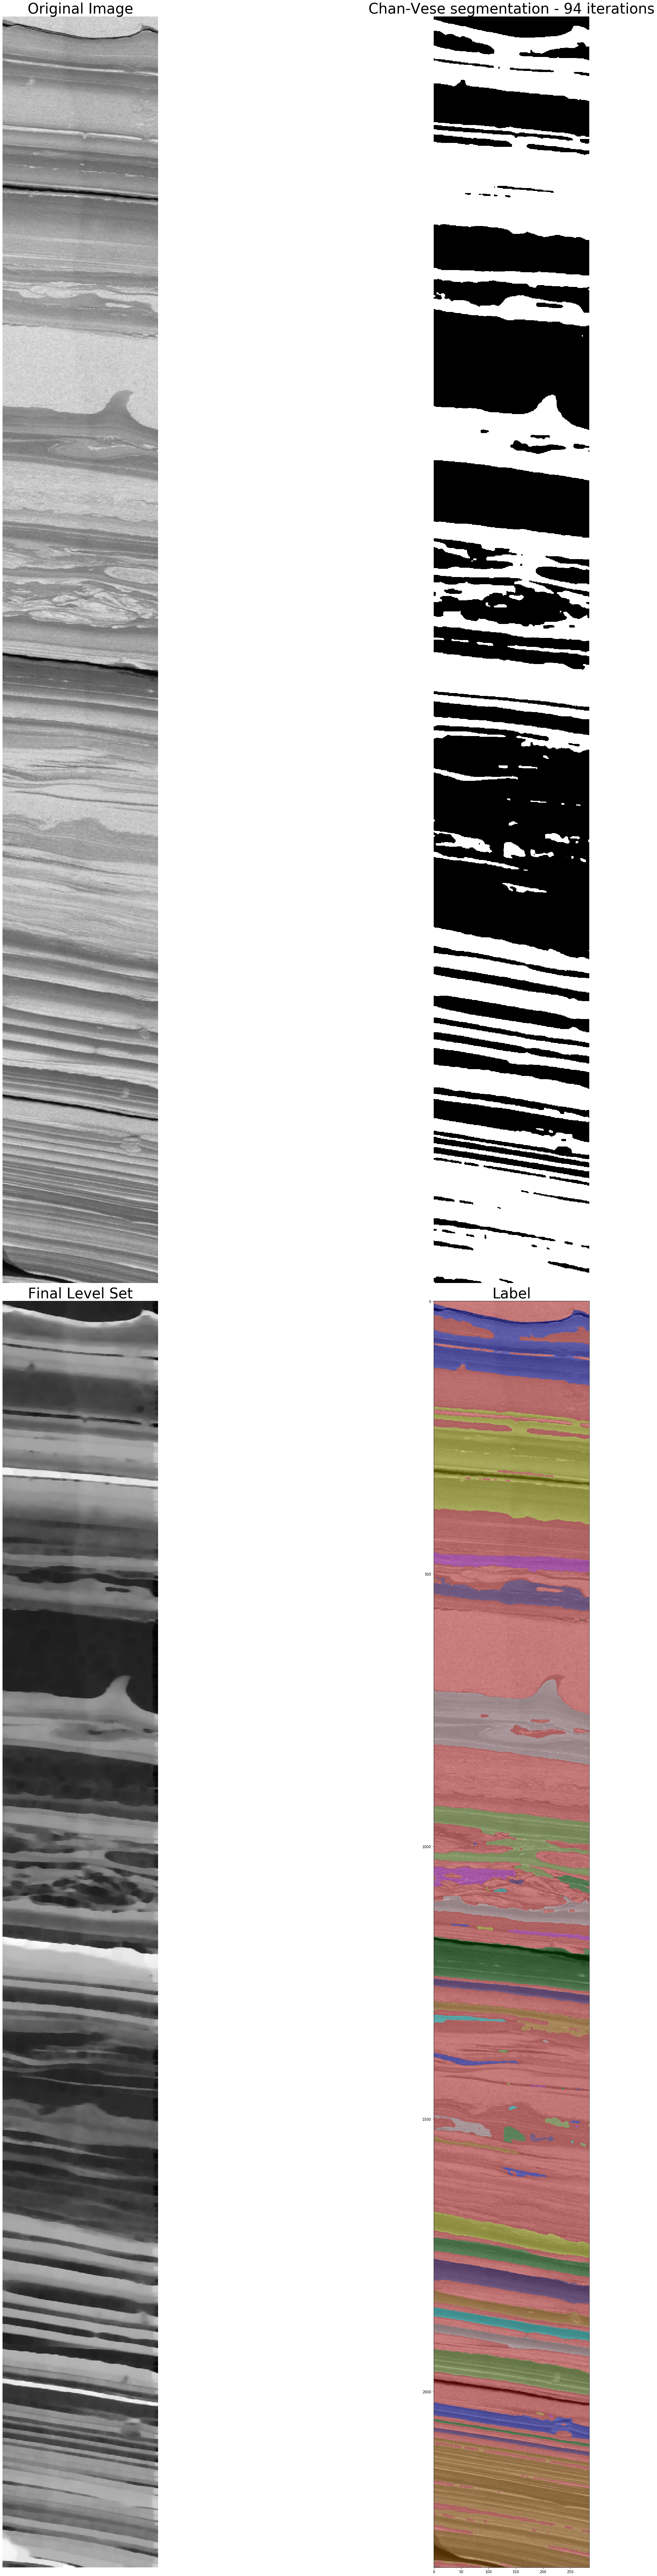

In [2]:
image = rgb2gray(plt.imread('data/Unload1/data/1000022.jpeg'))
image = image[:,60:-60]
cv = chan_vese(image, mu=0.1, lambda1=1, lambda2=1, tol=0.001, max_iter=200,
               dt=0.5, init_level_set="checkerboard", extended_output=True)
lbl = measure.label(cv[0], neighbors=8)
overlay = label2rgb(lbl, image=image)

fig, axes = plt.subplots(2, 2, figsize=(40,100))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=40)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = "Chan-Vese segmentation - {} iterations".format(len(cv[2]))
ax[1].set_title(title, fontsize=40)

ax[2].imshow(cv[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Level Set", fontsize=40)

ax[3].imshow(overlay)
ax[3].set_title("Label", fontsize=40)

fig.tight_layout()
plt.show()

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

In [33]:
img = plt.imread('data/Unload1/data/1000022.jpeg')
img = img[:,60:-60]

segments_fz = felzenszwalb(img, scale=1000, sigma=0.5, min_size=500)
segments_slic = slic(img, n_segments=50, compactness=0.000001, sigma=3)


print(f"Felzenszwalb number of segments: {len(np.unique(segments_fz))}")
print(f"SLIC number of segments: {len(np.unique(segments_slic))}")

Felzenszwalb number of segments: 35
SLIC number of segments: 13


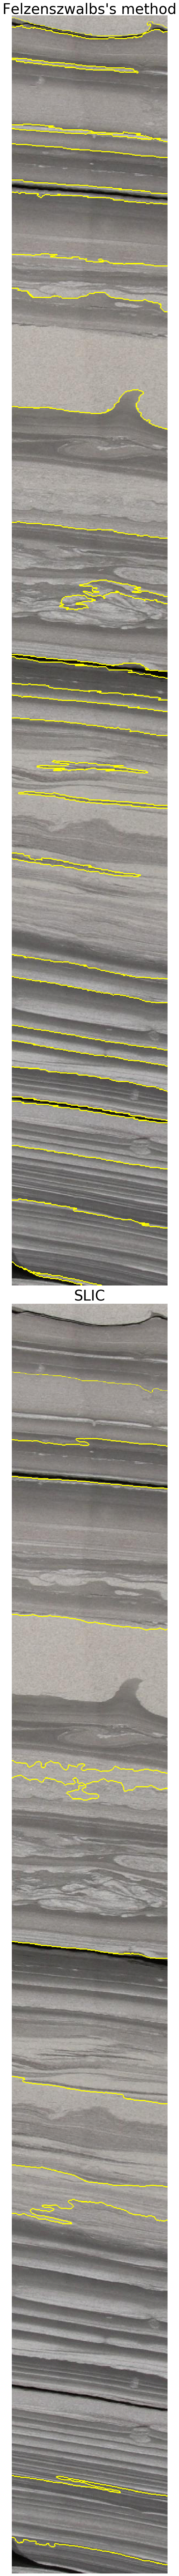

In [34]:
fig, ax = plt.subplots(2, 1, figsize=(40, 100), sharex=True, sharey=True)

ax[0].imshow(mark_boundaries(img, segments_fz))
ax[0].set_title("Felzenszwalbs's method", fontsize=40)
ax[1].imshow(mark_boundaries(img, segments_slic))
ax[1].set_title('SLIC', fontsize=40)

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()

In [7]:
from skimage.feature import canny
from scipy import ndimage as ndi
from skimage.morphology import watershed
from skimage.exposure import histogram

hist, hist_centers = histogram(image)
edges = canny(image, sigma=3)
fill_img = ndi.binary_fill_holes(edges)
label_objects, nb_labels = ndi.label(fill_img)
sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 20
mask_sizes[0] = 0
img_cleaned = mask_sizes[label_objects]
elevation_map = sobel(image)
markers = np.zeros_like(image)
markers[image < 30] = 1
markers[image > 150] = 2
segmentation = watershed(elevation_map, markers)
segmentation = ndi.binary_fill_holes(segmentation - 1)
labeled_img, _ = ndi.label(segmentation)

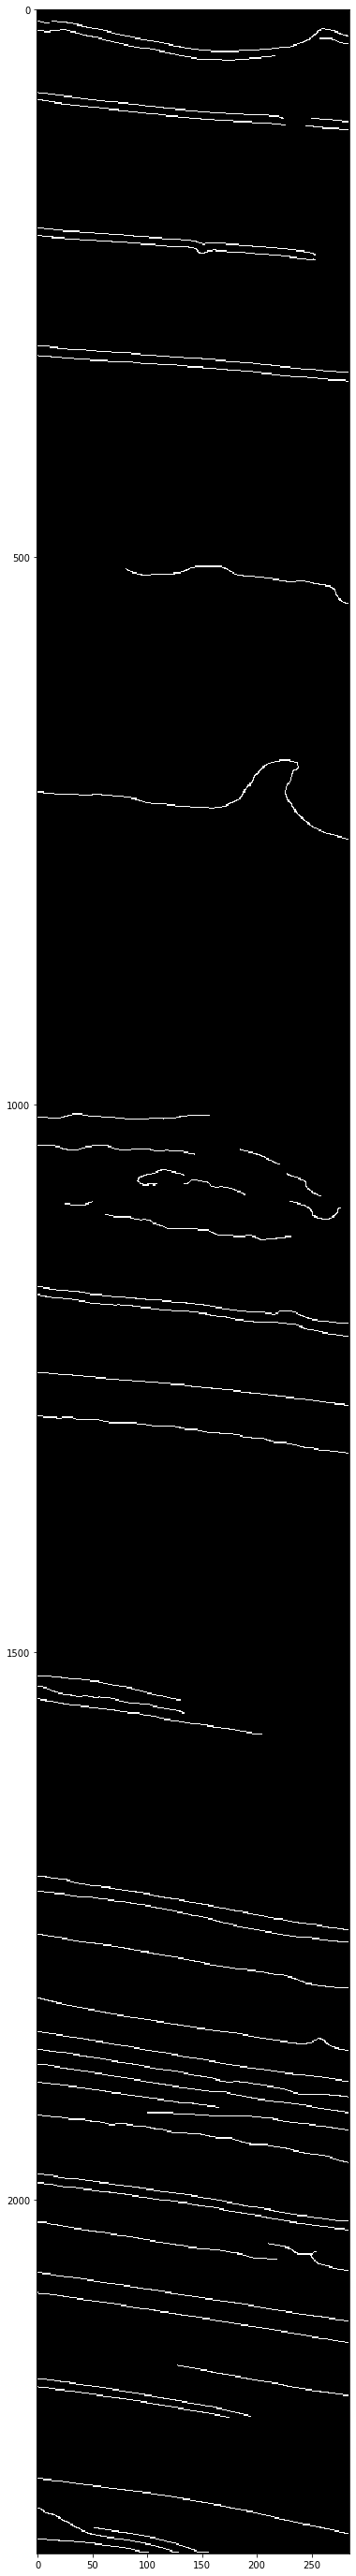

In [8]:
fig, ax = plt.subplots(figsize=(20,50))
ax.imshow(edges, cmap=plt.cm.gray)

plt.show()